# **Mission 2_주차 등록 수요 데이터 전처리**

## <미션>

 1) [단지별 공통 정보]와 [단지 상세 정보]를 분리하기
 2) 범주형 변수의 category 수 줄이기
 3) [단지별 공통 정보]의 중복행 제거
 4) [단지 상세 정보] 집계를 통해 단지별 정보 구하기 
      * 전용면적 구간별 총 세대수
      * 단지별 임대보증금, 임대료
      * 임대건물구분 비율 (면적 비율)
      * 공급 유형 비율 (면적 비율)
 5) [단지별 공통 정보]와 [단지 상세 정보]의 집계 내용을 합치기 

## <환경설정>

### &nbsp;&nbsp; 1) 라이브러리 불러오기

* 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
* 필요하다고 판단되는 라이브러리를 추가하세요.

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 아래 필요한 라이브러리, 함수를 추가하시오.


In [223]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '2일차_과정_정리.pptx',
 'registered_parking_car-원본.csv',
 'registered_parking_car.csv',
 '미션2_주차 등록 수요_데이터 전처리_에이블러용_lv1 송주영 정리본.ipynb',
 '미션2_주차 등록 수요_데이터 전처리_에이블러용_lv1 원본.ipynb',
 '미션2_주차 등록 수요_데이터 전처리_에이블러용_lv1.ipynb',
 '미션2_주차 등록 수요_데이터 전처리_에이블러용_lv2.ipynb']

### &nbsp;&nbsp; 2) 한글 폰트 설정하기

In [224]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### &nbsp;&nbsp; 3) 데이터 불러오기

* 파일명 : registered_parking_car.csv
* data 변수에 저장하기 

In [225]:
file = "registered_parking_car.csv"

## 코드 입력
data = pd.read_csv(file, encoding = 'UTF - 8')
data.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [226]:
data['임대건물구분'].value_counts()

아파트    2070
상가      527
Name: 임대건물구분, dtype: int64

<br><br><hr>

## 1. 기본정보 확인하기


* **세부 요구사항**
    - 불러온 데이터의 형태, 기초통계량, 정보 등을 확인합니다.
    - 특히 .info() 를 통해서 각 변수별 데이터타입이 적절한지 확안합니다.

### &nbsp;&nbsp; 1-1) 전체 데이터의 행, 열 개수 확인

In [227]:
## shape
## 코드 입력


### &nbsp;&nbsp; 1-2) 전체 데이터의 상위 5개 행 확인

In [228]:
## head
## 코드 입력


In [229]:
data.head(5)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


### &nbsp;&nbsp; 1-3) 전체 데이터의 모든 변수명 (columns) 확인

In [230]:
## columns
## 코드 입력

In [231]:
data.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

### &nbsp;&nbsp; 1-4) 결측치 (N/A) 존재 여부 확인, 각 컬럼의 데이터 타입 확인

In [232]:
## info, isna
## 코드 입력

In [233]:
display(data.info())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2597 non-null   object 
 1   총세대수                          2597 non-null   int64  
 2   임대건물구분                        2597 non-null   object 
 3   지역                            2597 non-null   object 
 4   공급유형                          2597 non-null   object 
 5   전용면적                          2597 non-null   float64
 6   전용면적별세대수                      2597 non-null   int64  
 7   공가수                           2597 non-null   float64
 8   자격유형                          2597 non-null   object 
 9   임대보증금                         2070 non-null   object 
 10  임대료                           2070 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2418 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2593 non-null   float64
 13  단지내

None

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           527
임대료                             527
도보 10분거리 내 지하철역 수(환승노선 수 반영)    179
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

<br><br><hr>

## 2. [단지별 공통 정보]와 [단지 상세 정보] 분리 및 중복 제거

### &nbsp;&nbsp; 3-1) 공통정보/상세정보 분리

 * [단지별 공통 정보] 
    * 대상 컬럼 : 단지코드, 총 세대수, 지역, 공가수, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수, 등록 차량수
    * 변수명 : danji_main
 * [단지 상세 정보] 
    * 대상 컬럼 : 단지 코드, 임대건물구분, 공급유형, 전용면적, 전용면적별세대수, 임대보증금, 임대료
    * 변수명 : danji_detail
  

In [234]:
## 단지별 공통 정보 

danji_vars = ['단지코드', '총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수', '등록차량수']
danji_main = data[danji_vars].copy()


# 단지 상세 정보
danji_detail_vars = ['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '임대보증금', '임대료']
danji_detail = data[danji_detail_vars].copy()


In [235]:
## 단지별 공통 정보 

danji_vars = ['단지코드', '총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수', '등록차량수']
danji_main = data[danji_vars].copy()


# 단지 상세 정보
danji_detail_vars = ['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '임대보증금', '임대료']
danji_detail = data[danji_detail_vars].copy()
danji_detail.head(5)

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,임대보증금,임대료
0,C2483,아파트,국민임대,39.72,134,15667000,103680
1,C2483,아파트,국민임대,39.72,15,15667000,103680
2,C2483,아파트,국민임대,51.93,385,27304000,184330
3,C2483,아파트,국민임대,51.93,15,27304000,184330
4,C2483,아파트,국민임대,51.93,41,27304000,184330


### &nbsp;&nbsp; 3-2) 전체 데이터의 모든 변수명 (columns) 확인 긴 글자로 된 column명 변경하기

 -  '도보 10분거리 내 지하철역 수(환승노선 수 반영)'  ==> '지하철역수'
 - '도보 10분거리 내 버스정류장 수'  ==> '버스정류장수'

In [236]:
##  컬럼 변경 하기 : rename
## 코드 입력

danji_main

,단지코드,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,등록차량수
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0
1,C2483,900,경상북도,38.0,0.0,3.0,1015.0
2,C2483,900,경상북도,38.0,0.0,3.0,1015.0
3,C2483,900,경상북도,38.0,0.0,3.0,1015.0
4,C2483,900,경상북도,38.0,0.0,3.0,1015.0
...,...,...,...,...,...,...,...
2592,C2532,239,강원도,7.0,0.0,1.0,146.0
2593,C2532,239,강원도,7.0,0.0,1.0,146.0
2594,C2532,239,강원도,7.0,0.0,1.0,146.0
2595,C2532,239,강원도,7.0,0.0,1.0,146.0


In [237]:
danji_main.head()

,단지코드,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,등록차량수
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0
1,C2483,900,경상북도,38.0,0.0,3.0,1015.0
2,C2483,900,경상북도,38.0,0.0,3.0,1015.0
3,C2483,900,경상북도,38.0,0.0,3.0,1015.0
4,C2483,900,경상북도,38.0,0.0,3.0,1015.0


In [238]:
danji_main.rename( columns = { '도보 10분거리 내 지하철역 수(환승노선 수 반영)' : '지하철역수',
                      '도보 10분거리 내 버스정류장 수' : '버스정류장수'}, inplace = True)
danji_main.head()

,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0
1,C2483,900,경상북도,38.0,0.0,3.0,1015.0
2,C2483,900,경상북도,38.0,0.0,3.0,1015.0
3,C2483,900,경상북도,38.0,0.0,3.0,1015.0
4,C2483,900,경상북도,38.0,0.0,3.0,1015.0


### &nbsp;&nbsp; 3-3) [단지별 공통 정보]의 중복행 제거하기

In [239]:
## 중복행 제거 : drop_duplicates
## 코드 입력

danji_main.head()

,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0
1,C2483,900,경상북도,38.0,0.0,3.0,1015.0
2,C2483,900,경상북도,38.0,0.0,3.0,1015.0
3,C2483,900,경상북도,38.0,0.0,3.0,1015.0
4,C2483,900,경상북도,38.0,0.0,3.0,1015.0


In [240]:
danji_main = danji_main.drop_duplicates().copy()

In [241]:
danji_main.head()

,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0
8,C2515,545,경상남도,17.0,0.0,3.0,205.0
15,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0
26,C1945,755,경기도,6.0,1.0,3.0,730.0
32,C1470,696,전라북도,14.0,0.0,2.0,553.0


In [242]:
# # 단지 코드별 행 개수를 체크하여 중복 제거가 잘 되었는지 확인  : groupby 활용
# # groupby로 count한 값이 1보다 큰 출력값은 중복임

# ## '단지코드'별로 그룹핑하여 '총세대수' 열의 개수를 세기 (count)
# ## unique_check 변수에 저장하기
# unique_check = danji_main.groupby(     , as_index = False)

# # unique_check 데이터프레임의 컬럼명을 ['단지코드','count']로 컬럼 이름 바꾸기 
# unique_check.columns = ['단지코드',	'count']

# # unique_check 데이터프레임 중 'count'열이 1보다 큰 경우를 조회하기
# unique_check.loc[unique_check['count']>1] 

In [243]:
unique_check = danji_main.groupby( by = '단지코드', as_index=False)[['총세대수']].count()
display(unique_check.head(4))

unique_check.columns = [ '단지코드','count']
display(unique_check.head(4))

display(unique_check.loc[unique_check['count']>1])

,단지코드,총세대수
0,C1000,1
1,C1005,1
2,C1013,1
3,C1014,1


,단지코드,count
0,C1000,1
1,C1005,1
2,C1013,1
3,C1014,1


,단지코드,count


In [244]:
print('='*100,'\ndain_mina',sep='')
display(danji_main)

dain_mina


,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0
8,C2515,545,경상남도,17.0,0.0,3.0,205.0
15,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0
26,C1945,755,경기도,6.0,1.0,3.0,730.0
32,C1470,696,전라북도,14.0,0.0,2.0,553.0
...,...,...,...,...,...,...,...
2577,C2586,90,제주특별자치도,7.0,0.0,3.0,57.0
2582,C2035,492,강원도,24.0,0.0,1.0,246.0
2587,C2020,40,부산광역시,7.0,1.0,2.0,19.0
2590,C2437,90,충청북도,12.0,0.0,1.0,16.0


## 4. 범주형 변수의 category 수 줄이기, 숫자형 변수 확인하기 

### &nbsp;&nbsp; 4-1) ‘공급유형’: ‘공공임대(10년)’, ‘공공임대(5년)’…등으로 나뉜 것을 하나의 범주 값인 ‘공공임대’ 로 통합하기

In [245]:
## [단지 상세 정보] '공급유형'의 category 확인하기 : value_counts
## 코드 입력

In [246]:
danji_detail['공급유형'].value_counts()

국민임대         1545
임대상가          527
행복주택          178
공공임대(10년)     167
영구임대          131
공공임대(50년)      31
공공임대(분납)        9
장기전세            6
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [247]:
# ## ['공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)'] ==> '공공임대'로 수정
# change_list = ['공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)'] 

# ## 코드 입력
# danji_detail.loc[] =

# ## 확인 : value_counts()
# ## 코드 입력

In [248]:
change_list = ['공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)'] 
danji_detail.loc[danji_detail['공급유형'].isin(change_list), '공급유형'] = '공공임대'

In [249]:
danji_detail['공급유형'].value_counts()

국민임대    1545
임대상가     527
공공임대     210
행복주택     178
영구임대     131
장기전세       6
Name: 공급유형, dtype: int64

### &nbsp;&nbsp; 4-2) 숫자가 입력되어야 하는 컬럼에 문자 ‘-’가 입력된 경우를 찾아, 숫자로 변환하기

* 대상 컬럼 찾기 
* object 타입을 int64나 float64로 변환

In [250]:
## [단지 상세 정보]에서 숫자형이어야 하는데 object형으로 보이는 컬럼은 무엇인가요? : info()
## 코드 입력

In [251]:
display(danji_detail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2597 non-null   object 
 1   임대건물구분    2597 non-null   object 
 2   공급유형      2597 non-null   object 
 3   전용면적      2597 non-null   float64
 4   전용면적별세대수  2597 non-null   int64  
 5   임대보증금     2070 non-null   object 
 6   임대료       2070 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 142.2+ KB


None

In [252]:
# ## 숫자가 아닌 데이터를 찾고 있는 행 찾기 #1
# ## 코드 입력
# danji_detail[ ]

In [253]:
# ## 숫자가 아닌 데이터를 찾고 있는 행 찾기 #2
# ## 코드 입력

# danji_detail[ ]

In [254]:
# danji_detail.loc[ (danji_detail['임대보증금']  == 'object') | (danji_detail['임대료']  == 'object') ]
print('='*100,'\n임대료가 숫자가 아닌 부분 찾기',sep='')
display(danji_detail[ danji_detail['임대료'].str.isnumeric()==False].head(10)) # 숫자형으로 한 번 바뀌면 str,isnumeric은 사용 불가!!
print('='*100)

임대료가 숫자가 아닌 부분 찾기


,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,임대보증금,임대료
1828,C1397,아파트,장기전세,23.32,51,87444000,-
1829,C1397,아파트,장기전세,46.79,4,174888000,-
1830,C1397,아파트,장기전세,46.91,69,174888000,-
1831,C1397,아파트,장기전세,51.96,24,194562000,-
1832,C1397,아파트,장기전세,51.99,80,194562000,-
1833,C1397,아파트,장기전세,59.93,142,216423000,-
2257,C1326,아파트,국민임대,24.72,472,-,-
2258,C1326,아파트,국민임대,24.79,104,-,-
2259,C1326,아파트,국민임대,26.83,590,-,-
2260,C1326,아파트,국민임대,37.70,464,-,-


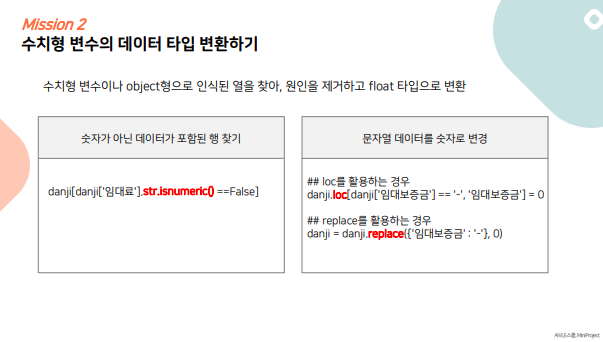

In [255]:
# ## 숫자가 아닌 데이터가 있는 열을 0으로 대체하기

# ## loc를 활용하는 경우
# ## 코드 입력
# danji_detail.loc[] = 
# danji_detail.loc[] = 

In [256]:
danji_detail.loc[danji_detail['임대보증금']=='-', '임대보증금' ] = 0
danji_detail.loc[danji_detail['임대료']=='-', '임대료' ] = 0
# replace를 이용하면, danji.replace({'임대보증금' :'-' },0)

In [257]:
# ## 해당 칼럼에  데이터 중 '-' 가 있는지 확인하기
# ## 코드 입력

# danji_detail[ ]

In [258]:
danji_detail[ danji_detail['임대료'].str.isnumeric()==False]
# danji_detail[danji_detail['임대료'].str.isnumeric()==False]

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,임대보증금,임대료


In [259]:
## 해당 칼럼의 dtype을 object --> float로 수정하기 : astype
## 코드 입력

## 확인하기 : info
## 코드 입력

In [260]:
danji_detail['임대보증금'] = danji_detail['임대보증금'].astype('float64')
danji_detail['임대료'] = danji_detail['임대료'].astype('float64')

In [261]:
danji_detail.head(5)

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,임대보증금,임대료
0,C2483,아파트,국민임대,39.72,134,15667000.0,103680.0
1,C2483,아파트,국민임대,39.72,15,15667000.0,103680.0
2,C2483,아파트,국민임대,51.93,385,27304000.0,184330.0
3,C2483,아파트,국민임대,51.93,15,27304000.0,184330.0
4,C2483,아파트,국민임대,51.93,41,27304000.0,184330.0


In [262]:
danji_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2597 non-null   object 
 1   임대건물구분    2597 non-null   object 
 2   공급유형      2597 non-null   object 
 3   전용면적      2597 non-null   float64
 4   전용면적별세대수  2597 non-null   int64  
 5   임대보증금     2070 non-null   float64
 6   임대료       2070 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 142.2+ KB


In [263]:
danji_detail['공급유형'].value_counts()

국민임대    1545
임대상가     527
공공임대     210
행복주택     178
영구임대     131
장기전세       6
Name: 공급유형, dtype: int64

In [264]:
print('='*100,'\ndanji_detail',sep='')
display(danji_detail)
print('='*100)

danji_detail


,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,임대보증금,임대료
0,C2483,아파트,국민임대,39.72,134,15667000.0,103680.0
1,C2483,아파트,국민임대,39.72,15,15667000.0,103680.0
2,C2483,아파트,국민임대,51.93,385,27304000.0,184330.0
3,C2483,아파트,국민임대,51.93,15,27304000.0,184330.0
4,C2483,아파트,국민임대,51.93,41,27304000.0,184330.0
...,...,...,...,...,...,...,...
2592,C2532,아파트,국민임대,49.20,19,11346000.0,116090.0
2593,C2532,아파트,국민임대,51.08,34,14005000.0,142310.0
2594,C2532,아파트,국민임대,51.73,34,14005000.0,142310.0
2595,C2532,아파트,국민임대,51.96,114,14005000.0,142310.0


<br><br><hr>

## 5. [단지 상세 정보] 집계를 통해 단지별 정보 구하기

### &nbsp;&nbsp; 5-1) 전용면적 구간별 총 세대수 구하기

* [단지 상세 정보]에서 단지코드, 전용면적, 전용면적별세대수 만을 추출하여 base_5_1 에 저장하기
* 전용면적 구간별 세대 수 집계 (groupby)
* 단지 코드를 index로, 전용면적 구간을 컬럼(열)으로 하여 전용면적별세대수 구하기 (pivot)

In [265]:
## [단지 상세 정보]에서 단지코드, 전용면적, 전용면적별세대수 만을 추출하여 base_5_1 에 저장하기

base_5_1 = danji_detail[['단지코드', '전용면적', '전용면적별세대수']].copy()
print('='*100,'\nbase_5_1',sep='')
display(base_5_1.head())
print('='*100)

base_5_1


,단지코드,전용면적,전용면적별세대수
0,C2483,39.72,134
1,C2483,39.72,15
2,C2483,51.93,385
3,C2483,51.93,15
4,C2483,51.93,41


count    2597.000000
mean       44.607370
std        32.844454
min        12.620000
25%        32.100000
50%        39.840000
75%        51.490000
max       583.400000
Name: 전용면적, dtype: float64

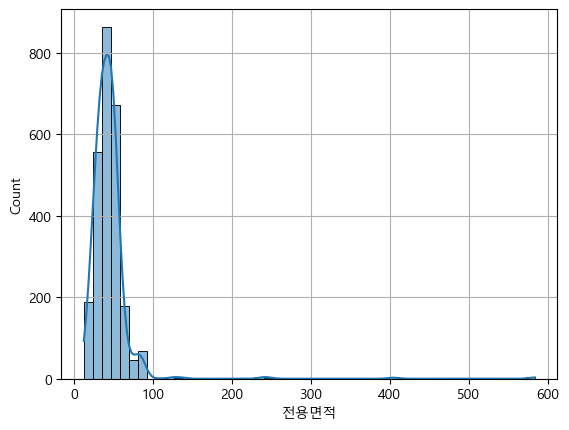

In [266]:
# base_5_1['전용면적'] 데이터의 기초 통계량 확인

display(base_5_1['전용면적'].describe().T)

# base_5_1['전용면적]' 데이터 분포 시각화 확인 (sns.histplot)
sns.histplot(x = '전용면적', data = base_5_1, kde = True, bins=50)
plt.grid()
plt.show()

In [267]:
# ## 전용 면적을 의미있는 구분할 수 있는 구간 나눠보고, 그에 맞는 라벨 설정하기
# ## 코드 입력

# bins = 

# labels = '전용면적'

# ## base_5_1 '전용면적'을 정해진 bins/labels 기준으로 나누고, '전용면적구간'이름으로 추가하기
# ## 코드 입력
# base_5_1

# ## 확인
# base_5_1.head()

In [268]:
bin = [-np.inf, 30, 40, 50, 100, np.inf]
label = ['전용면적_10_30' ,'전용면적_30_40', '전용면적_40_50','전용면적_50_100', '전용면적 100이상']
base_5_1['전용면적구간'] = pd.cut(base_5_1['전용면적'], bins=bin, labels = label)

In [269]:
print('='*50,'\nbase_5_1',sep='')
print('전용면적구간을 추가')
display(base_5_1.head(10))
print('='*50)

base_5_1
전용면적구간을 추가


,단지코드,전용면적,전용면적별세대수,전용면적구간
0,C2483,39.72,134,전용면적_30_40
1,C2483,39.72,15,전용면적_30_40
2,C2483,51.93,385,전용면적_50_100
3,C2483,51.93,15,전용면적_50_100
4,C2483,51.93,41,전용면적_50_100
5,C2483,51.95,89,전용면적_50_100
6,C2483,51.95,135,전용면적_50_100
7,C2483,59.88,86,전용면적_50_100
8,C2515,33.48,276,전용면적_30_40
9,C2515,39.60,60,전용면적_30_40


In [270]:
# base_5_1.groupby(by = '단지코드', as_index = False)[['전용면적구간']].head()
base_5_1.groupby(by = '전용면적구간', as_index = False)[['단지코드']].head()
group_5_1 = base_5_1.groupby(by = ['단지코드','전용면적구간',], as_index = False)[['전용면적별세대수']].sum()
print('='*50,'\ngroup_5_1',sep='')
print('전용면적별세대수 계산하여 추가')
display(group_5_1)
print('='*50)

group_5_1
전용면적별세대수 계산하여 추가


,단지코드,전용면적구간,전용면적별세대수
0,C1000,전용면적_10_30,0
1,C1000,전용면적_30_40,419
2,C1000,전용면적_40_50,72
3,C1000,전용면적_50_100,75
4,C1000,전용면적 100이상,0
...,...,...,...
1860,C2692,전용면적_10_30,0
1861,C2692,전용면적_30_40,334
1862,C2692,전용면적_40_50,105
1863,C2692,전용면적_50_100,60


In [271]:
# ## 전용면적 구간별 세대수 집계하기 : groupby
# ## 결과를 group_5_1에 저장하기
# ## 코드 입력
# base_5_1.groupby(  by = '전용면적구간' , as_index = False)[['']].sum()
# # group_5_1 = base_5_1.groupby(  by = '전용면적구간'    , as_index = False).sum()

# ## group_5_1 값 확인하기
# # group_5_1.head()

In [272]:
## 단지 코드를 index로, 전용면적 구간을 컬럼(열)으로 하여 전용면적별세대수 구하기 (pivot)
## 결과를 result_5_1 저장
## 단지 코드를 index --> 컬럼으로 변경하기 : reset_index, drop=False, inplace=True

## 코드 입력

result_5_1 = group_5_1.pivot(index = '단지코드', columns = '전용면적구간',values = '전용면적별세대수')

result_5_1.reset_index(inplace = True, drop=False)

print('-'*50,'\nresult_5_1')
display(result_5_1.head())
print('-'*50)

-------------------------------------------------- 
result_5_1


전용면적구간,단지코드,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_100,전용면적 100이상
0,C1000,0,419,72,75,0
1,C1005,0,0,0,1144,0
2,C1013,0,291,757,260,0
3,C1014,0,516,280,200,0
4,C1015,0,475,380,106,0


--------------------------------------------------


### &nbsp;&nbsp; 5-2) 단지별 임대보증금, 임대료 구하기 (평균, 중앙값)

* 단지별 임대보증금, 임대료의 전체 평균/중앙값 구하기

In [273]:
## [단지 상세 정보]에서 단지코드, 임대보증금, 임대료 정보 추출하기 : base_5_2 에 저장
## 코드 입력

base_5_2 = danji_detail.loc[:,['단지코드','전용면적별세대수','임대보증금','임대료']]
print('='*50,'\nbase_5_2',sep='')
print("단지 상세 정보(danji_detail)에서 ['단지코드','전용면적별세대수','임대보증금','임대료'] 추출")
display(base_5_2)

base_5_2
단지 상세 정보(danji_detail)에서 ['단지코드','전용면적별세대수','임대보증금','임대료'] 추출


,단지코드,전용면적별세대수,임대보증금,임대료
0,C2483,134,15667000.0,103680.0
1,C2483,15,15667000.0,103680.0
2,C2483,385,27304000.0,184330.0
3,C2483,15,27304000.0,184330.0
4,C2483,41,27304000.0,184330.0
...,...,...,...,...
2592,C2532,19,11346000.0,116090.0
2593,C2532,34,14005000.0,142310.0
2594,C2532,34,14005000.0,142310.0
2595,C2532,114,14005000.0,142310.0


## 단지별 임대보증금, 임대료 평균값 구하기 : groupby, mean

In [274]:
# ## 단지별 임대보증금, 임대료 평균값 구하기 : groupby, mean
# ## group_5_2_mean 저장
# ## 코드 입력

# group_5_2_mean = 
# group_5_2_mean

In [275]:
# group_5_1 = base_5_1.groupby(by = ['단지코드','전용면적구간',], as_index = False)[['전용면적별세대수']].sum()

group_5_2_mean = base_5_2.groupby(by = ['단지코드',], as_index=False)[['임대보증금','임대료']].mean()
print('='*50,'\n<group_5_2_mean>',sep='')
print('base_5_2 데이터프레임에서 평균 계산')
display(group_5_2_mean)
print('='*50)

<group_5_2_mean>
base_5_2 데이터프레임에서 평균 계산


,단지코드,임대보증금,임대료
0,C1000,1.320357e+07,121064.285714
1,C1005,1.710767e+07,222046.666667
2,C1013,2.492480e+07,134726.000000
3,C1014,2.389400e+07,160488.571429
4,C1015,1.587125e+07,136192.500000
...,...,...,...
368,C2661,1.326167e+07,184936.666667
369,C2666,1.889050e+07,133145.000000
370,C2670,1.635000e+07,115188.000000
371,C2680,2.360633e+07,129816.666667


In [276]:
# ## 단지별 임대보증금, 임대료 중앙값 구하기  : groupby, median
# ## group_5_2_median 저장
# ## 코드 입력

# group_5_2_median = 
# group_5_2_median

In [277]:
print('='*50,'\n<base_5_2> 상태',sep='')
display(base_5_2)

group_5_2_median = base_5_2.groupby(by = ['단지코드'], as_index=False)[['임대보증금','임대료']].median()
print('='*50,'\n<group_5_2_median>',sep='')
print('중앙값 출력')
display(group_5_2_median)
print('='*50)

<base_5_2> 상태


,단지코드,전용면적별세대수,임대보증금,임대료
0,C2483,134,15667000.0,103680.0
1,C2483,15,15667000.0,103680.0
2,C2483,385,27304000.0,184330.0
3,C2483,15,27304000.0,184330.0
4,C2483,41,27304000.0,184330.0
...,...,...,...,...
2592,C2532,19,11346000.0,116090.0
2593,C2532,34,14005000.0,142310.0
2594,C2532,34,14005000.0,142310.0
2595,C2532,114,14005000.0,142310.0


<group_5_2_median>
중앙값 출력


,단지코드,임대보증금,임대료
0,C1000,14404000.0,129640.0
1,C1005,16348000.0,210900.0
2,C1013,24665000.0,135960.0
3,C1014,21628000.0,150190.0
4,C1015,15583000.0,140810.0
...,...,...,...
368,C2661,10215000.0,186010.0
369,C2666,18890500.0,133145.0
370,C2670,14863000.0,111470.0
371,C2680,25293000.0,145410.0


### &nbsp;&nbsp; <font color="orange">**[도전 미션]** </font>  단지별 임대보증금, 임대료의 가중 평균 구하기

   * 1) 임대보증금 * 세대수, 임대료 * 세대수 구하기 (전용면적별 총 임대보증금, 총 임대료)
   * 2) 단지별 총 임대보증금, 총 임대료, 총 세대수 구하기 (groupby)
   * 3) 임대보증금 가중 평균 = 총 임대보증금 / 총 세대수, 임대료 가중 평균 = 총 임대료 / 총 세대수

In [278]:
## [임대보증금, 임대료]  * 전용면적별세대수 ==> [세대수X임대보증금, 세대수X임대료] 구하기
## 코드 입력

## 단지별 [세대수X임대보증금, total_임대료] 합계 구하기 : groupby
## group_5_2_weighted_mean 에 저장
## 코드 입력

## 단지별 [total_임대보증금, total_임대료] 합계를 단지별 총 전용면적별세대수로 나눠 가중 평균 구하기
## 코드 입력

In [279]:
print('='*50,'\n<현재 base_5_2의 상태>',sep='')
display(base_5_2)


base_5_2['세대수X임대보증금']=base_5_2['전용면적별세대수']*base_5_2['임대보증금']
base_5_2['세대수X임대료']=base_5_2['전용면적별세대수']*base_5_2['임대료']


print('='*50, '\ng<roup_5_2_weight_mean>')
print("단지 코드를 기준으로 하여 ['세대수X임대보증금','세대수X임대료','전용면적별세대수']를 groupby")
group_5_2_weighted_mean = base_5_2.groupby(['단지코드'],as_index=False)[['세대수X임대보증금','세대수X임대료','전용면적별세대수']].sum()
display(group_5_2_weighted_mean)

group_5_2_weighted_mean['임대보증금'] = group_5_2_weighted_mean['세대수X임대보증금']/group_5_2_weighted_mean['전용면적별세대수'] 
group_5_2_weighted_mean['임대료'] = group_5_2_weighted_mean['세대수X임대료'] / group_5_2_weighted_mean['전용면적별세대수']

print('='*50,'\n<group_5_2_weighted_mean>',sep='')
print('임대보증금 가중평균 = 총 임대보증금 / 총 세대수 & 임대 가중평균 = 총 임대료 / 총 세대수')
display(group_5_2_weighted_mean)

<현재 base_5_2의 상태>


,단지코드,전용면적별세대수,임대보증금,임대료
0,C2483,134,15667000.0,103680.0
1,C2483,15,15667000.0,103680.0
2,C2483,385,27304000.0,184330.0
3,C2483,15,27304000.0,184330.0
4,C2483,41,27304000.0,184330.0
...,...,...,...,...
2592,C2532,19,11346000.0,116090.0
2593,C2532,34,14005000.0,142310.0
2594,C2532,34,14005000.0,142310.0
2595,C2532,114,14005000.0,142310.0


g<roup_5_2_weight_mean>
단지 코드를 기준으로 하여 ['세대수X임대보증금','세대수X임대료','전용면적별세대수']를 groupby


,단지코드,세대수X임대보증금,세대수X임대료,전용면적별세대수
0,C1000,6.733845e+09,60823650.0,566
1,C1005,1.923992e+10,249139680.0,1144
2,C1013,3.247882e+10,175392620.0,1308
3,C1014,1.755086e+10,147813760.0,996
4,C1015,1.327353e+10,116580990.0,961
...,...,...,...,...
368,C2661,4.469902e+09,63770620.0,354
369,C2666,2.084144e+10,147347300.0,1084
370,C2670,1.052350e+10,74018160.0,648
371,C2680,1.671293e+10,87485700.0,758


<group_5_2_weighted_mean>
임대보증금 가중평균 = 총 임대보증금 / 총 세대수 & 임대 가중평균 = 총 임대료 / 총 세대수


,단지코드,세대수X임대보증금,세대수X임대료,전용면적별세대수,임대보증금,임대료
0,C1000,6.733845e+09,60823650.0,566,1.189725e+07,107462.279152
1,C1005,1.923992e+10,249139680.0,1144,1.681811e+07,217779.440559
2,C1013,3.247882e+10,175392620.0,1308,2.483090e+07,134092.217125
3,C1014,1.755086e+10,147813760.0,996,1.762135e+07,148407.389558
4,C1015,1.327353e+10,116580990.0,961,1.381220e+07,121312.164412
...,...,...,...,...,...,...
368,C2661,4.469902e+09,63770620.0,354,1.262684e+07,180142.994350
369,C2666,2.084144e+10,147347300.0,1084,1.922642e+07,135929.243542
370,C2670,1.052350e+10,74018160.0,648,1.623996e+07,114225.555556
371,C2680,1.671293e+10,87485700.0,758,2.204873e+07,115416.490765


* 평균/중앙값/가중 평균 중 대표값 선정하기
*  <font color='red'> **도전 미션을 하지 않아도 평균/중앙값 중에서 대표값 선정해야 함!!!!! [필수]** </font>

In [280]:
# ## danji_main 데이터에 합칠 정보는 무엇인가? 
# ## 1) 평균     2) 중앙값    3) 가중평균
# ## 선택된 정보를 result_5_2 저장하기
# ## 코드 입력
# result_5_2 = 
# result_5_2

In [281]:
result_5_2 = group_5_2_weighted_mean[['단지코드','임대보증금','임대료']]
print('='*50,'\n<result_5_2>',sep='')
print('위에서 정의한 group_5_2_mean에서 임대보증금의 가중평균과 임대료의 가중평균 값을 가져온다')
display(result_5_2 )

<result_5_2>
위에서 정의한 group_5_2_mean에서 임대보증금의 가중평균과 임대료의 가중평균 값을 가져온다


,단지코드,임대보증금,임대료
0,C1000,1.189725e+07,107462.279152
1,C1005,1.681811e+07,217779.440559
2,C1013,2.483090e+07,134092.217125
3,C1014,1.762135e+07,148407.389558
4,C1015,1.381220e+07,121312.164412
...,...,...,...
368,C2661,1.262684e+07,180142.994350
369,C2666,1.922642e+07,135929.243542
370,C2670,1.623996e+07,114225.555556
371,C2680,2.204873e+07,115416.490765


### &nbsp;&nbsp; <font color="orange">**[도전 미션]** </font>  5-3) 임대건물구분 비율 구하기

* 임대건물구분 비율, 공급유형 비율 집계에 필요한 정보만 추출
* 전용면적에 세대수를 반영하여 총면적 열 추가

In [282]:
## [단지 상세 정보]의 ['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수'] 열을 base_5_3 변수에 저장
## 코드 입력

## 전용면적 * 전용면적별세대수 구하기 (열 이름 : 세대수X전용면적)
## 코드 입력


* 임대건물구분별 면적 비율
    * 단지별 임대건물구분(상가,아파트)별 총 면적 계산
    * 비율로 변환


In [283]:
## 단지코드와 임대건물구분으로 '세대수X전용면적' 집계하기
## group_5_3에 저장
## 코드 입력



In [284]:
base_5_3 = danji_detail[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수']].copy()
print('='*50, '\n<base_5_3>')
display(base_5_3)


base_5_3['세대수X전용면적'] = base_5_3['전용면적'] * base_5_3['전용면적별세대수']

print('='*50,'\n<base_5_3>')
print('전체 면적수를 계산')
display(base_5_3)

group_5_3 = base_5_3.groupby(['단지코드','임대건물구분'], as_index= False)['세대수X전용면적'].sum()
print('='*50,'\n<group_5_3>')
print('단지코드와 임대건물구분을 기준으로 <세대수X전용면적>을 합한다.')
display(group_5_3)

<base_5_3>


,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수
0,C2483,아파트,국민임대,39.72,134
1,C2483,아파트,국민임대,39.72,15
2,C2483,아파트,국민임대,51.93,385
3,C2483,아파트,국민임대,51.93,15
4,C2483,아파트,국민임대,51.93,41
...,...,...,...,...,...
2592,C2532,아파트,국민임대,49.20,19
2593,C2532,아파트,국민임대,51.08,34
2594,C2532,아파트,국민임대,51.73,34
2595,C2532,아파트,국민임대,51.96,114


<base_5_3>
전체 면적수를 계산


,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,세대수X전용면적
0,C2483,아파트,국민임대,39.72,134,5322.48
1,C2483,아파트,국민임대,39.72,15,595.80
2,C2483,아파트,국민임대,51.93,385,19993.05
3,C2483,아파트,국민임대,51.93,15,778.95
4,C2483,아파트,국민임대,51.93,41,2129.13
...,...,...,...,...,...,...
2592,C2532,아파트,국민임대,49.20,19,934.80
2593,C2532,아파트,국민임대,51.08,34,1736.72
2594,C2532,아파트,국민임대,51.73,34,1758.82
2595,C2532,아파트,국민임대,51.96,114,5923.44


<group_5_3>
단지코드와 임대건물구분을 기준으로 <세대수X전용면적>을 합한다.


,단지코드,임대건물구분,세대수X전용면적
0,C1000,아파트,23871.18
1,C1005,아파트,61136.56
2,C1013,아파트,60105.87
3,C1014,아파트,41309.94
4,C1015,아파트,41381.88
...,...,...,...
398,C2661,아파트,12730.24
399,C2666,아파트,47445.20
400,C2670,아파트,26289.12
401,C2680,아파트,30507.30


In [285]:
## 단지코드를 index로 임대건물구분을 열로, 총 면적을 값으로 pivot table 구하기
## pivot_5_3 에 저장
## 코드 입력

## index로 적용된 단지코드를 열로 변경 : reset_index
## 코드 입력


In [286]:
pivot_5_3 = group_5_3.pivot(index='단지코드', columns = '임대건물구분', values = '세대수X전용면적')

print('='*50,'\n<pivot_5_3>')
display(pivot_5_3)

pivot_5_3.reset_index(inplace=True)
print('='*50,'\n<pivot_5_3>')
print('단지코드 컬럼 또한 사용하기 위해 reset_index 과정을 해주며 drop은 하지 않는다.')
display(pivot_5_3)

<pivot_5_3>


임대건물구분,상가,아파트
단지코드,,
C1000,NaN,23871.18
C1005,NaN,61136.56
C1013,NaN,60105.87
C1014,NaN,41309.94
C1015,NaN,41381.88
...,...,...
C2661,NaN,12730.24
C2666,NaN,47445.20
C2670,NaN,26289.12


<pivot_5_3>
단지코드 컬럼 또한 사용하기 위해 reset_index 과정을 해주며 drop은 하지 않는다.


임대건물구분,단지코드,상가,아파트
0,C1000,NaN,23871.18
1,C1005,NaN,61136.56
2,C1013,NaN,60105.87
3,C1014,NaN,41309.94
4,C1015,NaN,41381.88
...,...,...,...
368,C2661,NaN,12730.24
369,C2666,NaN,47445.20
370,C2670,NaN,26289.12
371,C2680,NaN,30507.30


In [287]:
## pivlot table의 NaN값으로 0으로 대체하기
## 코드 입력

pivot_5_3= pivot_5_3.fillna(0)
print('='*50,'\n<pivot_5_3>')
print('결측치 NaN을 0으로 대체')
display(pivot_5_3 )

<pivot_5_3>
결측치 NaN을 0으로 대체


임대건물구분,단지코드,상가,아파트
0,C1000,0.0,23871.18
1,C1005,0.0,61136.56
2,C1013,0.0,60105.87
3,C1014,0.0,41309.94
4,C1015,0.0,41381.88
...,...,...,...
368,C2661,0.0,12730.24
369,C2666,0.0,47445.20
370,C2670,0.0,26289.12
371,C2680,0.0,30507.30


In [288]:
## pivlot table에서 단지별 총 면적 구하기 : 상가면적 + 아파트 면적
## 코드 입력

## pivlot table에서 상가비율, 아파트비율 구하기 : 상가면적 / (상가+아파트), 아파트면적 / (상가+아파트)
## 코드 입력

## pivot table의 ['단지코드', '상가비율', '아파트비율'] 정보를 result_5_3에 저장하기
## 코드 입력



In [289]:
pivot_5_3['상가+아파트'] = pivot_5_3['상가'] + pivot_5_3['아파트']
print('='*50,'\n<pivot_5_3>',sep='')
display(pivot_5_3)

pivot_5_3['상가비율'] = pivot_5_3['상가']/pivot_5_3['상가+아파트']
pivot_5_3['아파트비율'] = pivot_5_3['아파트']/pivot_5_3['상가+아파트']

print('='*50,'\n<pivot_5_3>',sep='')
print('pivot 테이블에 비율 값을 추가')
display(pivot_5_3)

result_5_3 = pivot_5_3[['단지코드','상가비율','아파트비율']]
print('='*50,'\n<result_5_3>',sep='')
print('result_5_3에는 pivot_5_3에서 필요한 요소만 추출')
display(result_5_3)

<pivot_5_3>


임대건물구분,단지코드,상가,아파트,상가+아파트
0,C1000,0.0,23871.18,23871.18
1,C1005,0.0,61136.56,61136.56
2,C1013,0.0,60105.87,60105.87
3,C1014,0.0,41309.94,41309.94
4,C1015,0.0,41381.88,41381.88
...,...,...,...,...
368,C2661,0.0,12730.24,12730.24
369,C2666,0.0,47445.20,47445.20
370,C2670,0.0,26289.12,26289.12
371,C2680,0.0,30507.30,30507.30


<pivot_5_3>
pivot 테이블에 비율 값을 추가


임대건물구분,단지코드,상가,아파트,상가+아파트,상가비율,아파트비율
0,C1000,0.0,23871.18,23871.18,0.0,1.0
1,C1005,0.0,61136.56,61136.56,0.0,1.0
2,C1013,0.0,60105.87,60105.87,0.0,1.0
3,C1014,0.0,41309.94,41309.94,0.0,1.0
4,C1015,0.0,41381.88,41381.88,0.0,1.0
...,...,...,...,...,...,...
368,C2661,0.0,12730.24,12730.24,0.0,1.0
369,C2666,0.0,47445.20,47445.20,0.0,1.0
370,C2670,0.0,26289.12,26289.12,0.0,1.0
371,C2680,0.0,30507.30,30507.30,0.0,1.0


<result_5_3>
result_5_3에는 pivot_5_3에서 필요한 요소만 추출


임대건물구분,단지코드,상가비율,아파트비율
0,C1000,0.0,1.0
1,C1005,0.0,1.0
2,C1013,0.0,1.0
3,C1014,0.0,1.0
4,C1015,0.0,1.0
...,...,...,...
368,C2661,0.0,1.0
369,C2666,0.0,1.0
370,C2670,0.0,1.0
371,C2680,0.0,1.0


### &nbsp;&nbsp; <font color="orange">**[도전 미션]** </font>  5-4) 공급유형 비율 구하기

* 5-4) 에서 저장된 base_5_3 변수를 이용하여 집계


In [290]:
## 단지코드와 공급유형별로 총면적 집계하기
## group_5_4 저장
## 코드 입력


In [291]:
print('='*50,'\n<base_5_3>',sep='')
display(base_5_3)

group_5_4 = base_5_3.groupby(['단지코드','공급유형'], as_index= False)['세대수X전용면적'].sum()
print('='*50,'\n<base_5_4>',sep='')
print('base_5_3에서 단지코드와 공급유형을 기준으로 "세대수X전용면적"을 합한다.')
display(group_5_4)

<base_5_3>


,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,세대수X전용면적
0,C2483,아파트,국민임대,39.72,134,5322.48
1,C2483,아파트,국민임대,39.72,15,595.80
2,C2483,아파트,국민임대,51.93,385,19993.05
3,C2483,아파트,국민임대,51.93,15,778.95
4,C2483,아파트,국민임대,51.93,41,2129.13
...,...,...,...,...,...,...
2592,C2532,아파트,국민임대,49.20,19,934.80
2593,C2532,아파트,국민임대,51.08,34,1736.72
2594,C2532,아파트,국민임대,51.73,34,1758.82
2595,C2532,아파트,국민임대,51.96,114,5923.44


<base_5_4>
base_5_3에서 단지코드와 공급유형을 기준으로 "세대수X전용면적"을 합한다.


,단지코드,공급유형,세대수X전용면적
0,C1000,국민임대,23871.18
1,C1005,국민임대,61136.56
2,C1013,국민임대,60105.87
3,C1014,국민임대,41309.94
4,C1015,국민임대,41381.88
...,...,...,...
422,C2661,국민임대,12730.24
423,C2666,국민임대,47445.20
424,C2670,국민임대,26289.12
425,C2680,국민임대,30507.30


In [292]:
## 단지코드를 index로 공급유형을 열로, '세대수X전용면적'을 값으로 pivot table 구하기
## pivot_5_4 저장
## 코드 입력

# index에 적용된 단지코드를 컬럼으로 변경하기 : reset_index
## 코드 입력

In [293]:
print('='*50,'\n<group_5_4>',sep='')
display(group_5_4)

pivot_5_4 = group_5_4.pivot(index='단지코드',columns='공급유형',values='세대수X전용면적')

print('='*50,'\n<pivot_5_4>',sep='')
display(pivot_5_4)

pivot_5_4.reset_index(inplace=True)

print('='*50,'\n<pivot_5_4>',sep='')
print('단지코드를 컬럼으로 사용하기 위해 reset_index를 수행')
display(pivot_5_4)



<group_5_4>


,단지코드,공급유형,세대수X전용면적
0,C1000,국민임대,23871.18
1,C1005,국민임대,61136.56
2,C1013,국민임대,60105.87
3,C1014,국민임대,41309.94
4,C1015,국민임대,41381.88
...,...,...,...
422,C2661,국민임대,12730.24
423,C2666,국민임대,47445.20
424,C2670,국민임대,26289.12
425,C2680,국민임대,30507.30


<pivot_5_4>


공급유형,공공임대,국민임대,영구임대,임대상가,장기전세,행복주택
단지코드,,,,,,
C1000,NaN,23871.18,NaN,NaN,NaN,NaN
C1005,NaN,61136.56,NaN,NaN,NaN,NaN
C1013,NaN,60105.87,NaN,NaN,NaN,NaN
C1014,NaN,41309.94,NaN,NaN,NaN,NaN
C1015,NaN,41381.88,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
C2661,NaN,12730.24,NaN,NaN,NaN,NaN
C2666,NaN,47445.20,NaN,NaN,NaN,NaN
C2670,NaN,26289.12,NaN,NaN,NaN,NaN


<pivot_5_4>
단지코드를 컬럼으로 사용하기 위해 reset_index를 수행


공급유형,단지코드,공공임대,국민임대,영구임대,임대상가,장기전세,행복주택
0,C1000,NaN,23871.18,NaN,NaN,NaN,NaN
1,C1005,NaN,61136.56,NaN,NaN,NaN,NaN
2,C1013,NaN,60105.87,NaN,NaN,NaN,NaN
3,C1014,NaN,41309.94,NaN,NaN,NaN,NaN
4,C1015,NaN,41381.88,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
368,C2661,NaN,12730.24,NaN,NaN,NaN,NaN
369,C2666,NaN,47445.20,NaN,NaN,NaN,NaN
370,C2670,NaN,26289.12,NaN,NaN,NaN,NaN
371,C2680,NaN,30507.30,NaN,NaN,NaN,NaN


In [294]:
## pivlot table의 NaN값으로 0으로 대체하기
## 코드 입력


In [295]:
pivot_5_4 = pivot_5_4.fillna(0)
print('='*50,'\n<pivot_5_4>')
print('결측치를 0으로 처리')
display(pivot_5_4)

<pivot_5_4>
결측치를 0으로 처리


공급유형,단지코드,공공임대,국민임대,영구임대,임대상가,장기전세,행복주택
0,C1000,0.0,23871.18,0.0,0.0,0.0,0.0
1,C1005,0.0,61136.56,0.0,0.0,0.0,0.0
2,C1013,0.0,60105.87,0.0,0.0,0.0,0.0
3,C1014,0.0,41309.94,0.0,0.0,0.0,0.0
4,C1015,0.0,41381.88,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
368,C2661,0.0,12730.24,0.0,0.0,0.0,0.0
369,C2666,0.0,47445.20,0.0,0.0,0.0,0.0
370,C2670,0.0,26289.12,0.0,0.0,0.0,0.0
371,C2680,0.0,30507.30,0.0,0.0,0.0,0.0


In [296]:
## pivot table의 공급유형별 면적을 모두 더해 '총면적' 구하기
## 코드 입력


## pivot_5_4에서 공규유형별 면적 비율 구하기 : 각 면적 / 총면적
## 코드 입력


## 단지 코드의 공급유형별 면적 비율을 result_5_4에 저장하기 
## 코드 입력


In [297]:
print('='*50,'\n<pivot_5_4>',sep='')

pivot_5_4['총면적'] = pivot_5_4['공공임대'] + pivot_5_4['국민임대'] + pivot_5_4['영구임대'] + pivot_5_4['장기전세'] + pivot_5_4['행복주택']

pivot_5_4['공급유형_공공임대비율'] = pivot_5_4['공공임대']/pivot_5_4['총면적']
pivot_5_4['공급유형_국민임대비율'] = pivot_5_4['국민임대']/pivot_5_4['총면적']
pivot_5_4['공급유형_영구임대비율'] = pivot_5_4['영구임대']/pivot_5_4['총면적']
pivot_5_4['공급유형_임대상가비율'] = pivot_5_4['임대상가']/pivot_5_4['총면적']
pivot_5_4['공급유형_장기전세비율'] = pivot_5_4['장기전세']/pivot_5_4['총면적']
pivot_5_4['공급유형_행복주택비율'] = pivot_5_4['행복주택']/pivot_5_4['총면적']

print('='*50,'\n<pivot_5_4>',sep='')
print('pivot_5_4에 공급유형별 비율을 추가')
display(pivot_5_4)

result_var = ['단지코드', '공급유형_공공임대비율', '공급유형_국민임대비율', '공급유형_영구임대비율', '공급유형_임대상가비율', '공급유형_장기전세비율','공급유형_행복주택비율' ]

result_5_4 = pivot_5_4[result_var]
print('='*50,'\n<result_5_4>',sep='')
print('pivot_5_4에서 필요한 요소만 추출')
display(result_5_4)

<pivot_5_4>
<pivot_5_4>
pivot_5_4에 공급유형별 비율을 추가


공급유형,단지코드,공공임대,국민임대,영구임대,임대상가,장기전세,행복주택,총면적,공급유형_공공임대비율,공급유형_국민임대비율,공급유형_영구임대비율,공급유형_임대상가비율,공급유형_장기전세비율,공급유형_행복주택비율
0,C1000,0.0,23871.18,0.0,0.0,0.0,0.0,23871.18,0.0,1.0,0.0,0.0,0.0,0.0
1,C1005,0.0,61136.56,0.0,0.0,0.0,0.0,61136.56,0.0,1.0,0.0,0.0,0.0,0.0
2,C1013,0.0,60105.87,0.0,0.0,0.0,0.0,60105.87,0.0,1.0,0.0,0.0,0.0,0.0
3,C1014,0.0,41309.94,0.0,0.0,0.0,0.0,41309.94,0.0,1.0,0.0,0.0,0.0,0.0
4,C1015,0.0,41381.88,0.0,0.0,0.0,0.0,41381.88,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,C2661,0.0,12730.24,0.0,0.0,0.0,0.0,12730.24,0.0,1.0,0.0,0.0,0.0,0.0
369,C2666,0.0,47445.20,0.0,0.0,0.0,0.0,47445.20,0.0,1.0,0.0,0.0,0.0,0.0
370,C2670,0.0,26289.12,0.0,0.0,0.0,0.0,26289.12,0.0,1.0,0.0,0.0,0.0,0.0
371,C2680,0.0,30507.30,0.0,0.0,0.0,0.0,30507.30,0.0,1.0,0.0,0.0,0.0,0.0


<result_5_4>
pivot_5_4에서 필요한 요소만 추출


공급유형,단지코드,공급유형_공공임대비율,공급유형_국민임대비율,공급유형_영구임대비율,공급유형_임대상가비율,공급유형_장기전세비율,공급유형_행복주택비율
0,C1000,0.0,1.0,0.0,0.0,0.0,0.0
1,C1005,0.0,1.0,0.0,0.0,0.0,0.0
2,C1013,0.0,1.0,0.0,0.0,0.0,0.0
3,C1014,0.0,1.0,0.0,0.0,0.0,0.0
4,C1015,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
368,C2661,0.0,1.0,0.0,0.0,0.0,0.0
369,C2666,0.0,1.0,0.0,0.0,0.0,0.0
370,C2670,0.0,1.0,0.0,0.0,0.0,0.0
371,C2680,0.0,1.0,0.0,0.0,0.0,0.0


<br><br><hr>

## 6. [단지별 공통 정보]에 [단지 상세 정보] 집계 내용을 합치기 

* [단지별 공통 정보] : **danji_main**
* [단지 상세 정보] 집계
   * 전용 면적 구간별 세대수 : **result_5_1**
   * 임대보증금/임대료 : **result_5_2
   * 임대건물구분별 면적 비율 : **result_5_3**
   * 공급유형별 면적 비율 : **result_5_4**
* 합치기 :  merge를 사용할 때, **how = 'left', on = '단지코드'** 옵션 이용

### 6-1) 단지별 공통 정보 + 전용면적 구간별 세대수

In [298]:
## result 변수에 저장하기
## 코드 입력

result = pd.merge(  )
result.head()

TypeError: merge() missing 2 required positional arguments: 'left' and 'right'

In [302]:
print('='*50,'\n<danji_main>',sep='')
display(danji_main)

print('='*50,'\n<result_5_1>',sep='')
display(result_5_1)

result = pd.merge(danji_main, result_5_1, how='left', on='단지코드')
print('='*50,'\n<result>',sep='')
result.head()

<danji_main>


,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0
8,C2515,545,경상남도,17.0,0.0,3.0,205.0
15,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0
26,C1945,755,경기도,6.0,1.0,3.0,730.0
32,C1470,696,전라북도,14.0,0.0,2.0,553.0
...,...,...,...,...,...,...,...
2577,C2586,90,제주특별자치도,7.0,0.0,3.0,57.0
2582,C2035,492,강원도,24.0,0.0,1.0,246.0
2587,C2020,40,부산광역시,7.0,1.0,2.0,19.0
2590,C2437,90,충청북도,12.0,0.0,1.0,16.0


<result_5_1>


전용면적구간,단지코드,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_100,전용면적 100이상
0,C1000,0,419,72,75,0
1,C1005,0,0,0,1144,0
2,C1013,0,291,757,260,0
3,C1014,0,516,280,200,0
4,C1015,0,475,380,106,0
...,...,...,...,...,...,...
368,C2661,140,110,104,0,0
369,C2666,0,458,626,0,0
370,C2670,0,504,0,144,0
371,C2680,0,486,272,0,0


<result>


,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_100,전용면적 100이상
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0,0,149,0,751,0
1,C2515,545,경상남도,17.0,0.0,3.0,205.0,0,356,57,132,0
2,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0,0,390,702,124,0
3,C1945,755,경기도,6.0,1.0,3.0,730.0,0,240,0,515,0
4,C1470,696,전라북도,14.0,0.0,2.0,553.0,0,254,196,246,0


### 6-2)  result + 임대보증금/임대료

In [42]:
## 코드 입력

result = pd.merge()
result.head()


,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_100,전용면적_100이상,임대보증금,임대료
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0,0,149,0,751,0,2.566916e+07,173838.877778
1,C2515,545,경상남도,17.0,0.0,3.0,205.0,0,356,57,132,0,1.403597e+07,119431.266055
2,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0,0,390,702,124,0,2.760498e+07,171132.236842
3,C1945,755,경기도,6.0,1.0,3.0,730.0,0,240,0,515,0,2.244915e+07,187414.211921
4,C1470,696,전라북도,14.0,0.0,2.0,553.0,0,254,196,246,0,1.939399e+07,125449.224138


In [305]:
reult = pd.merge(result,result_5_2, how='left', on='단지코드')
print('='*50,'\n<reult>',sep='')
display(reult)

<reult>


,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_100,전용면적 100이상,임대보증금,임대료
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0,0,149,0,751,0,2.566916e+07,173838.877778
1,C2515,545,경상남도,17.0,0.0,3.0,205.0,0,356,57,132,0,1.403597e+07,119431.266055
2,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0,0,390,702,124,0,2.760498e+07,171132.236842
3,C1945,755,경기도,6.0,1.0,3.0,730.0,0,240,0,515,0,2.244915e+07,187414.211921
4,C1470,696,전라북도,14.0,0.0,2.0,553.0,0,254,196,246,0,1.939399e+07,125449.224138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,C2586,90,제주특별자치도,7.0,0.0,3.0,57.0,54,36,0,0,0,2.877333e+07,122286.666667
369,C2035,492,강원도,24.0,0.0,1.0,246.0,156,156,180,0,0,1.820122e+07,167341.463415
370,C2020,40,부산광역시,7.0,1.0,2.0,19.0,25,15,0,0,0,2.690000e+07,130016.250000
371,C2437,90,충청북도,12.0,0.0,1.0,16.0,90,0,0,0,0,1.034600e+07,107530.000000


### 6-3) result + 임대건물구분별 면적 비율 (도전 미션 완료 시)

In [43]:
## 코드 입력

result = pd.merge(  )
result.head()


,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_100,전용면적_100이상,임대보증금,임대료,상가비율,아파트비율
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0,0,149,0,751,0,2.566916e+07,173838.877778,0.0,1.0
1,C2515,545,경상남도,17.0,0.0,3.0,205.0,0,356,57,132,0,1.403597e+07,119431.266055,0.0,1.0
2,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0,0,390,702,124,0,2.760498e+07,171132.236842,0.0,1.0
3,C1945,755,경기도,6.0,1.0,3.0,730.0,0,240,0,515,0,2.244915e+07,187414.211921,0.0,1.0
4,C1470,696,전라북도,14.0,0.0,2.0,553.0,0,254,196,246,0,1.939399e+07,125449.224138,0.0,1.0


In [307]:
result = pd.merge(result, result_5_3, how= 'left', on='단지코드')
display(result)

,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_100,전용면적 100이상,상가비율_x,아파트비율_x,상가비율_y,아파트비율_y
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0,0,149,0,751,0,0.0,1.0,0.0,1.0
1,C2515,545,경상남도,17.0,0.0,3.0,205.0,0,356,57,132,0,0.0,1.0,0.0,1.0
2,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0,0,390,702,124,0,0.0,1.0,0.0,1.0
3,C1945,755,경기도,6.0,1.0,3.0,730.0,0,240,0,515,0,0.0,1.0,0.0,1.0
4,C1470,696,전라북도,14.0,0.0,2.0,553.0,0,254,196,246,0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,C2586,90,제주특별자치도,7.0,0.0,3.0,57.0,54,36,0,0,0,0.0,1.0,0.0,1.0
369,C2035,492,강원도,24.0,0.0,1.0,246.0,156,156,180,0,0,0.0,1.0,0.0,1.0
370,C2020,40,부산광역시,7.0,1.0,2.0,19.0,25,15,0,0,0,0.0,1.0,0.0,1.0
371,C2437,90,충청북도,12.0,0.0,1.0,16.0,90,0,0,0,0,0.0,1.0,0.0,1.0


### 6-4) 공급유형별 면적 비율 (도전 미션 완료 시)

In [44]:
## 코드 입력

result = pd.merge( )
result.head()

,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수,전용면적_10_30,전용면적_30_40,전용면적_40_50,...,임대보증금,임대료,상가비율,아파트비율,공급유형_공공임대비율,공급유형_국민임대비율,공급유형_영구임대비율,공급유형_임대상가비율,공급유형_장기전세비율,공급유형_행복주택비율
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0,0,149,0,...,2.566916e+07,173838.877778,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,C2515,545,경상남도,17.0,0.0,3.0,205.0,0,356,57,...,1.403597e+07,119431.266055,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0,0,390,702,...,2.760498e+07,171132.236842,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,C1945,755,경기도,6.0,1.0,3.0,730.0,0,240,0,...,2.244915e+07,187414.211921,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,C1470,696,전라북도,14.0,0.0,2.0,553.0,0,254,196,...,1.939399e+07,125449.224138,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [309]:
result = pd.merge(result, result_5_4, how='left', on='단지코드')
print('='*50,'\n<result>')
display(result.head())

<result>


,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수,전용면적_10_30,전용면적_30_40,전용면적_40_50,...,공급유형_영구임대비율_x,공급유형_임대상가비율_x,공급유형_장기전세비율_x,공급유형_행복주택비율_x,공급유형_공공임대비율_y,공급유형_국민임대비율_y,공급유형_영구임대비율_y,공급유형_임대상가비율_y,공급유형_장기전세비율_y,공급유형_행복주택비율_y
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0,0,149,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,C2515,545,경상남도,17.0,0.0,3.0,205.0,0,356,57,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0,0,390,702,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,C1945,755,경기도,6.0,1.0,3.0,730.0,0,240,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,C1470,696,전라북도,14.0,0.0,2.0,553.0,0,254,196,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##  7. 데이터셋 저장하기

* registerd_parking_preprocessed.csv 파일로 저장하기

In [46]:
## 코드 입력

result.to_csv( , index=False)

In [310]:
result.to_csv('./registerd_parking_preprocessed.csv', index=False)

## <font color="green"> **Mission Clear** </font> &nbsp; &nbsp; 수고하셨습니다!!